# Student Name: Qadeer Hussain

# Student ID: C00270632

# Topic: Recurrent Neural Network (RNN) 

# Last Modified: 23/03/2025

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the data

Link to data: https://www.gutenberg.org/ebooks/1057

In [2]:
# Load the file
with open("EmilyDickinsonPoems.txt", "r", encoding="utf-8") as f:
    raw_data = f.readlines()

# Explore the dataset

In [3]:
# Print basic stats
print("Total Characters in Raw Text:", len(raw_data))
print("Sample of Raw Text:\n")
print(raw_data[:1000])

Total Characters in Raw Text: 10703
Sample of Raw Text:

['\ufeffThe Project Gutenberg eBook of Poems by Emily Dickinson, Three Series, Complete\n', '    \n', 'This ebook is for the use of anyone anywhere in the United States and\n', 'most other parts of the world at no cost and with almost no restrictions\n', 'whatsoever. You may copy it, give it away or re-use it under the terms\n', 'of the Project Gutenberg License included with this ebook or online\n', 'at www.gutenberg.org. If you are not located in the United States,\n', 'you will have to check the laws of the country where you are located\n', 'before using this eBook.\n', '\n', 'Title: Poems by Emily Dickinson, Three Series, Complete\n', '\n', 'Author: Emily Dickinson\n', '\n', 'Release date: May 1, 2004 [eBook #12242]\n', '                Most recently updated: December 14, 2020\n', '\n', 'Language: English\n', '\n', 'Credits: Produced by Jim Tinsley <jtinsley@pobox.com>\n', '\n', '\n', '*** START OF THE PROJECT GUTENBERG EBOOK

# Data Preprocssing

In [4]:
# Poems start from line 209
poem_lines = raw_data[209:]

In [5]:
# Clean up the text
poems = []
for line in poem_lines:
    stripped = line.strip()
    if stripped and not stripped.isupper() and not stripped.isdigit():
        poems.append(stripped)

In [6]:
# Join and lower case
text = " ".join(poems).lower()

In [7]:
# Print sample after cleaning
print("Sample text:\n", text[:1000])
print("\nTotal Characters in Corpus:", len(text))

Sample text:
 [published in "a masque of poets" at the request of "h.h.," the author's fellow-townswoman and friend.] success is counted sweetest by those who ne'er succeed. to comprehend a nectar requires sorest need. not one of all the purple host who took the flag to-day can tell the definition, so clear, of victory, as he, defeated, dying, on whose forbidden ear the distant strains of triumph break, agonized and clear! our share of night to bear, our share of morning, our blank in bliss to fill, our blank in scorning. here a star, and there a star, some lose their way. here a mist, and there a mist, afterwards -- day! soul, wilt thou toss again? by just such a hazard hundreds have lost, indeed, but tens have won an all. angels' breathless ballot lingers to record thee; imps in eager caucus raffle for my soul. 't is so much joy! 't is so much joy! if i should fail, what poverty! and yet, as poor as i have ventured all upon a throw; have gained! yes! hesitated so this side the victor

In [8]:
# Get unique characters in the dataset
chars = sorted(set(text)) 

# Creating mappings
char_to_index = {char: idx for idx, char in enumerate(chars)}
index_to_char = {idx: char for idx, char in enumerate(chars)}

In [9]:
print(f"Unique characters: {len(chars)}")
print(f"Sample character mappings: {list(char_to_index.items())[:100]}")

Unique characters: 64
Sample character mappings: [(' ', 0), ('!', 1), ('"', 2), ('$', 3), ('%', 4), ("'", 5), ('(', 6), (')', 7), ('*', 8), (',', 9), ('-', 10), ('.', 11), ('/', 12), ('0', 13), ('1', 14), ('2', 15), ('3', 16), ('4', 17), ('5', 18), ('6', 19), ('7', 20), ('8', 21), ('9', 22), (':', 23), (';', 24), ('?', 25), ('[', 26), (']', 27), ('_', 28), ('a', 29), ('b', 30), ('c', 31), ('d', 32), ('e', 33), ('f', 34), ('g', 35), ('h', 36), ('i', 37), ('j', 38), ('k', 39), ('l', 40), ('m', 41), ('n', 42), ('o', 43), ('p', 44), ('q', 45), ('r', 46), ('s', 47), ('t', 48), ('u', 49), ('v', 50), ('w', 51), ('x', 52), ('y', 53), ('z', 54), ('è', 55), ('ë', 56), ('—', 57), ('‘', 58), ('’', 59), ('“', 60), ('”', 61), ('•', 62), ('™', 63)]


# Create training sequences

In [10]:
SEQ_LENGTH = 100

In [11]:
inputs = []
outputs = []

for i in range(len(text) - SEQ_LENGTH):
    inputs.append(text[i : i + SEQ_LENGTH])
    outputs.append(text[i + SEQ_LENGTH])

print(f"Total sequences: {len(inputs)}")

Total sequences: 176243


In [12]:
# Convert text to numerical format
X = np.array([[char_to_index[char] for char in seq] for seq in inputs])
y = np.array([char_to_index[char] for char in outputs])

In [13]:
print(f"Using {len(X)} sequences for training")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Using 176243 sequences for training
X shape: (176243, 100), y shape: (176243,)


In [14]:
X = to_categorical(X, num_classes=len(chars))
y = to_categorical(y, num_classes=len(chars))

In [15]:
print(f"New x shape (one-hot encoded): {X.shape}")
print(f"New y shape (one-hot encoded): {y.shape}")

New x shape (one-hot encoded): (176243, 100, 64)
New y shape (one-hot encoded): (176243, 64)


# Build the model

In [16]:
# Define RNN LSTM model
model = Sequential([
    LSTM(256, input_shape=(SEQ_LENGTH, len(chars)), return_sequences=True),
    LSTM(256),
    Dense(len(chars), activation="softmax")
])

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 256)          328704    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
Total params: 870464 (3.32 MB)
Trainable params: 870464 (3.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the model

In [17]:
EPOCHS = 20
BATCH_SIZE = 256

In [18]:
history = model.fit(
    X, 
    y, 
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS
)

Epoch 1/20


689/689 [==============================] - 482s 694ms/step - loss: 2.5309 - accuracy: 0.2849
Epoch 2/20
689/689 [==============================] - 456s 662ms/step - loss: 2.0504 - accuracy: 0.3960
Epoch 3/20
689/689 [==============================] - 444s 645ms/step - loss: 1.8748 - accuracy: 0.4399
Epoch 4/20
689/689 [==============================] - 445s 645ms/step - loss: 1.7618 - accuracy: 0.4696
Epoch 5/20
689/689 [==============================] - 452s 657ms/step - loss: 1.6752 - accuracy: 0.4916
Epoch 6/20
689/689 [==============================] - 452s 655ms/step - loss: 1.6003 - accuracy: 0.5114
Epoch 7/20
689/689 [==============================] - 446s 648ms/step - loss: 1.5346 - accuracy: 0.5293
Epoch 8/20
689/689 [==============================] - 465s 675ms/step - loss: 1.4730 - accuracy: 0.5455
Epoch 9/20
689/689 [==============================] - 473s 686ms/step - loss: 1.4146 - accuracy: 0.5622
Epoch 10/20
689/689 [==============================] - 472s 68

In [19]:
print("Final Training Accuracy:", history.history['accuracy'][-1])

Final Training Accuracy: 0.7362334728240967


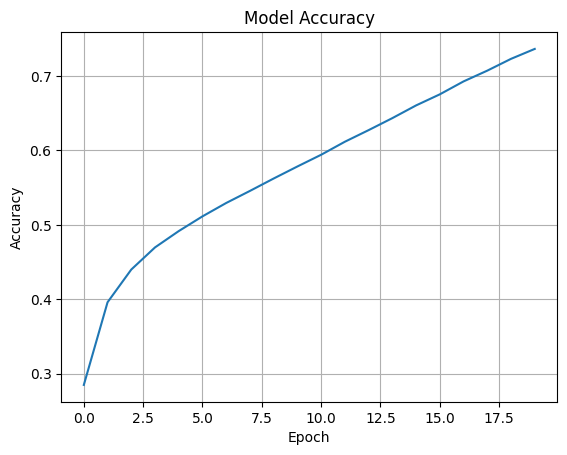

In [20]:
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

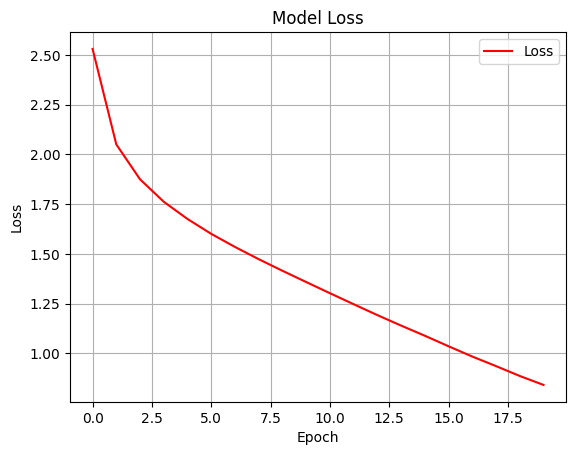

In [21]:
plt.plot(history.history['loss'], label='Loss', color='red')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Testing the model

In [ ]:
# def generate_text(model, start_string, num_generate=300, temperature=1.0):
#     # Convert start string to integers
#     input_indices = [char_to_index.get(char, 0) for char in start_string.lower()]
#     input_indices = tf.expand_dims(input_indices, 0)

#     # Store the generated characters
#     text_generated = []

#     for i in range(num_generate):
#         # Predict the next character probabilities
#         predictions = model(input_indices)
#         predictions = tf.squeeze(predictions, 0) 

#         # Focus only on the last prediction
#         predictions = predictions[-1] / temperature

#         # Sample from the distribution
#         predicted_id = tf.random.categorical(tf.expand_dims(predictions, 0), num_samples=1).numpy()[0][0]

#         # Add predicted char to generated text
#         text_generated.append(index_to_char[predicted_id])

#         # Update input with the predicted_id
#         input_indices = tf.expand_dims([predicted_id], 0)

#     return start_string + ''.join(text_generated)

In [ ]:
# seed_text = "The sky was dark"
# generated = generate_text(model, start_string=seed_text, num_generate=500, temperature=0.8)

# print(" Generated Text ")
# print(generated)

# Saving the model

In [ ]:
# model.save("poetry_generator_model.h5")